In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
cd

/root


In [31]:
cd /content/drive/My Drive

/content/drive/My Drive


In [0]:
from keras.datasets import mnist
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Conv2D,MaxPooling2D,AveragePooling2D,Flatten,UpSampling2D,Conv2DTranspose,Input,BatchNormalization
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle



In [22]:
import natsort
path="/content/drive/My Drive/SOTS/indoor/HaZy"
training_data=[]
IMG_SIZE=512
k=natsort.natsorted(os.listdir(path))
count=0
#for k in range(3):
#        X1[i][j][k]=X1[i][j][k] / 255.0
for img in k:
  img_array=cv2.imread(os.path.join(path,img))
  #if count%10==0:
  print(count)
  imgq=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
  new_array=cv2.resize(imgq,(IMG_SIZE,IMG_SIZE))
  training_data.append(new_array)
  count+=1
Y1=np.array(training_data).reshape(-1,IMG_SIZE,IMG_SIZE,3)
print(Y1.shape)
Y1=Y1/255.0


0


error: ignored

In [6]:
import natsort
path="/content/drive/My Drive/hsts/synthetic/original"
training_data=[]
IMG_SIZE=512
k=natsort.natsorted(os.listdir(path))
count=0
#for k in range(3):
#        X1[i][j][k]=X1[i][j][k] / 255.0
for img in k:
  img_array=cv2.imread(os.path.join(path,img))
  #if count%10==0:
  print(count)
  imgq=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
  new_array=cv2.resize(imgq,(IMG_SIZE,IMG_SIZE))
  training_data.append(new_array)
  count+=1
Y2=np.array(training_data).reshape(-1,IMG_SIZE,IMG_SIZE,3)
print(Y2.shape)
Y2=Y2/255.0

0
1
2
3
4
5
6
7
8
9
(10, 512, 512, 3)


In [7]:
import natsort
path="/content/drive/My Drive/hsts/realworld"
training_data=[]
IMG_SIZE=512
k=natsort.natsorted(os.listdir(path))
count=0
#for k in range(3):
#        X1[i][j][k]=X1[i][j][k] / 255.0
for img in k:
  img_array=cv2.imread(os.path.join(path,img))
  #if count%10==0:
  print(count)
  imgq=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
  new_array=cv2.resize(imgq,(IMG_SIZE,IMG_SIZE))
  training_data.append(new_array)
  count+=1
Y3=np.array(training_data).reshape(-1,IMG_SIZE,IMG_SIZE,3)
print(Y3.shape)
Y3=Y3/255.0

0
1
2
3
4
5
6
7
8
9
(10, 512, 512, 3)


In [33]:
cd /content/drive/My Drive/ITS checkpoints


/content/drive/My Drive/ITS checkpoints


In [0]:
auto=tf.keras.models.load_model("mo.model")
#auto1=tf.keras.models.load_model("mega_model.model")

In [0]:
pred=auto.predict(Y1)

In [0]:
pre=auto.predict(Y3)

In [40]:
from skimage import measure
sum=0
for i in range(10):
  s = measure.compare_psnr(Y2[i],pred[i])
  sum+=s
print("average PSNR :",sum/10)

average PSNR : 10.05904313687791


/usr/local/lib/python3.6/dist-packages/skimage/measure/simple_metrics.py:127: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  warn("Inputs have mismatched dtype.  Setting data_range based on "


In [18]:
from skimage import measure
sum=0
for i in range(10):
  s = measure.compare_ssim(Y2[i],pred[i],multichannel=True)
  sum+=s
print("average SSIM :",sum/10)

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:155: UserWarning: Inputs have mismatched dtype.  Setting data_range based on X.dtype.
  warn("Inputs have mismatched dtype.  Setting data_range based on "


average SSIM : 0.5544504851052272


In [0]:
import time
start_time = time.time()
p=auto.predict(Y1)
print("--- %s seconds ---" % (time.time() - start_time))


--- 0.18121600151062012 seconds ---


In [0]:
pre=auto.predict(Y3)

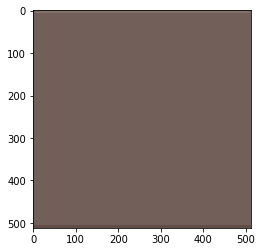

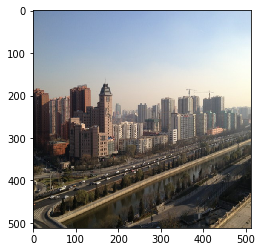

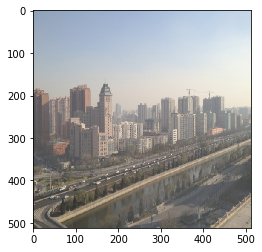

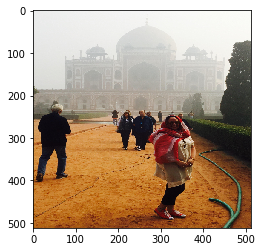

NameError: ignored

In [41]:
for i in range(9):
  plt.imshow(pred[i])
  plt.show()
  plt.imshow(Y2[i])
  plt.show()
  plt.imshow(Y1[i])
  plt.show()
  plt.imshow(Y3[i])
  plt.show()
  plt.imshow(Y4[i])
  plt.show()

In [0]:
from skimage import measure
sum=0
for i in range(9):
  s = measure.compare_psnr(Y2[i],pre[i])
  sum+=s
print("average PSNR :",sum/9)

from skimage import measure
sum=0
for i in range(9):
  k = measure.compare_ssim(Y2[i],pre[i],multichannel=True)
  sum+=k
print("average SSIM :",sum/9)

/usr/local/lib/python3.6/dist-packages/skimage/measure/simple_metrics.py:127: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  warn("Inputs have mismatched dtype.  Setting data_range based on "
/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:155: UserWarning: Inputs have mismatched dtype.  Setting data_range based on X.dtype.
  warn("Inputs have mismatched dtype.  Setting data_range based on "


average PSNR : 18.974088260464644
average SSIM : 0.8475795693174402


In [23]:
from keras.preprocessing.image import ImageDataGenerator
seed=0
datagen2=ImageDataGenerator(rescale=1.0/255.0)
datagen=ImageDataGenerator(rescale=1.0/255.0)
v_g=datagen2.flow_from_directory('/content/drive/My Drive/SOTS/indoor/HaZy',target_size=(512,512),class_mode=None,classes=['hazy'],batch_size=1,shuffle=False)
gt_g=datagen.flow_from_directory('/content/drive/My Drive/SOTS/indoor/GT_i',target_size=(512,512),class_mode=None,classes=['gt'],batch_size=1,shuffle=False)

Found 500 images belonging to 1 classes.
Found 500 images belonging to 1 classes.


In [0]:
print(len(os.listdir('/content/drive/My Drive/SOTS/outdoor/GT/gt')))

492


In [25]:
import time
start_time = time.time()
P=auto.predict_generator(v_g)
print("--- %s seconds ---" % (time.time() - start_time))



--- 205.73639178276062 seconds ---


In [0]:
import natsort
path="/content/drive/My Drive/ I-HAZY NTIRE 2018/hazy"
training_data=[]
IMG_SIZE=512
k=natsort.natsorted(os.listdir(path))
count=0
#for k in range(3):
#        X1[i][j][k]=X1[i][j][k] / 255.0
for img in k:
  img_array=cv2.imread(os.path.join(path,img))
  #if count%10==0:
  print(count)
  imgq=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
  new_array=cv2.resize(imgq,(IMG_SIZE,IMG_SIZE))
  training_data.append(new_array)
  count+=1
Y4=np.array(training_data).reshape(-1,IMG_SIZE,IMG_SIZE,3)
print(Y4.shape)
Y4=Y4/255.0

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
(30, 512, 512, 3)


In [0]:
import natsort
path="/content/drive/My Drive/ I-HAZY NTIRE 2018/GT"
training_data=[]
IMG_SIZE=512
k=natsort.natsorted(os.listdir(path))
count=0
#for k in range(3):
#        X1[i][j][k]=X1[i][j][k] / 255.0
for img in k:
  img_array=cv2.imread(os.path.join(path,img))
  #if count%10==0:
  print(count)
  imgq=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
  new_array=cv2.resize(imgq,(IMG_SIZE,IMG_SIZE))
  training_data.append(new_array)
  count+=1
Y5=np.array(training_data).reshape(-1,IMG_SIZE,IMG_SIZE,3)
print(Y5.shape)
Y5=Y5/255.0

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
(30, 512, 512, 3)


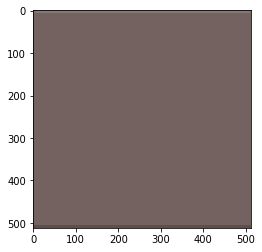

In [28]:
plt.imshow(P[0])

In [26]:
from skimage import measure
sum=0
for i in range(500):
  s = measure.compare_psnr(gt_g[i][0],P[i])
  sum+=s
print("average PSNR :",sum/500)

from skimage import measure
sum=0
for i in range(500):
  k = measure.compare_ssim(gt_g[i][0],P[i],multichannel=True)
  sum+=k
print("average SSIM :",sum/500)

average PSNR : 10.888089323084346
average SSIM : 0.510934281381002


In [27]:
print(P[i])

[[[0.47170419 0.43006787 0.4191497 ]
  [0.48879918 0.448827   0.4358127 ]
  [0.48986083 0.44761166 0.4366335 ]
  ...
  [0.5166078  0.46637437 0.44893324]
  [0.5066861  0.44969642 0.43794948]
  [0.48098177 0.42381853 0.4049061 ]]

 [[0.4553388  0.43847778 0.438224  ]
  [0.48525393 0.4621462  0.4527707 ]
  [0.48610234 0.45880723 0.44761732]
  ...
  [0.51619387 0.46220708 0.45328325]
  [0.5092786  0.44919991 0.43111968]
  [0.47743654 0.41925895 0.41021472]]

 [[0.45107052 0.43998146 0.43607032]
  [0.48680693 0.46100426 0.45107457]
  [0.48728338 0.4586862  0.44765082]
  ...
  [0.5205922  0.46295446 0.45252717]
  [0.51411957 0.45030504 0.43298587]
  [0.48027167 0.42055964 0.40937337]]

 ...

 [[0.3895296  0.3349261  0.30424994]
  [0.37131268 0.2983008  0.2826123 ]
  [0.36824286 0.29628068 0.28017893]
  ...
  [0.3723769  0.30060005 0.28908414]
  [0.3874272  0.31045026 0.3010729 ]
  [0.40524298 0.33663815 0.33062688]]

 [[0.38570556 0.32223183 0.30251873]
  [0.36668435 0.2942332  0.28012067]


In [0]:
!pip install tensorflow==1.14.0

     |████████████████████████████████| 109.2MB 36.1MB/s 
     |████████████████████████████████| 3.2MB 24.8MB/s 
ERROR: tensorboard 1.14.0 has requirement setuptools>=41.0.0, but you'll have setuptools 39.1.0 which is incompatible.
  Found existing installation: tensorboard 1.9.0
    Uninstalling tensorboard-1.9.0:
      Successfully uninstalled tensorboard-1.9.0
  Found existing installation: tensorflow 1.9.0
    Uninstalling tensorflow-1.9.0:
      Successfully uninstalled tensorflow-1.9.0


In [0]:
import keras
from keras.models import load_model
from keras.utils import CustomObjectScope
from keras.initializers import glorot_uniform

model = load_model('1665_model_8451.model')

ValueError: ignored